Z-score outliers:
 Empty DataFrame
Columns: [x, y, z_x, z_y]
Index: []

IQR outliers:
 Empty DataFrame
Columns: [x, y, z_x, z_y]
Index: []


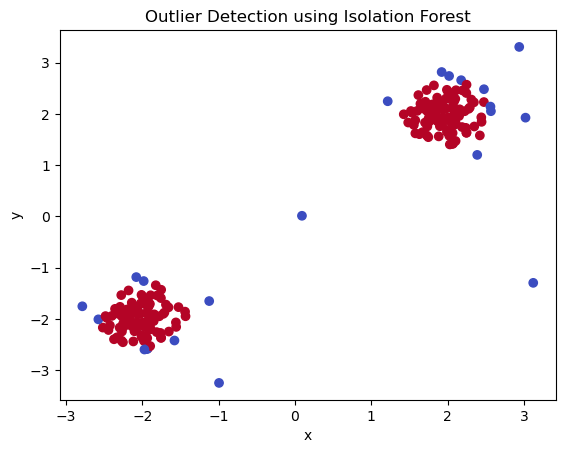

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Generate data with outliers
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(10, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# --- Z-score Method ---
df = pd.DataFrame(X, columns=['x', 'y'])
df['z_x'] = (df['x'] - df['x'].mean()) / df['x'].std()
df['z_y'] = (df['y'] - df['y'].mean()) / df['y'].std()

# Detect outliers where |Z| > 3
z_outliers = df[(df['z_x'].abs() > 3) | (df['z_y'].abs() > 3)]
print("Z-score outliers:\n", z_outliers)

# --- IQR Method ---
Q1 = df[['x', 'y']].quantile(0.25)
Q3 = df[['x', 'y']].quantile(0.75)
IQR = Q3 - Q1

# Outliers beyond 1.5*IQR
iqr_outliers = df[((df[['x', 'y']] < (Q1 - 1.5 * IQR)) | (df[['x', 'y']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nIQR outliers:\n", iqr_outliers)

# --- Isolation Forest ---
clf = IsolationForest(contamination=0.1, random_state=0)
preds = clf.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap='coolwarm')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
